<p style="font-size:28px;font-weight:bold;">Module 2 - Data Preview</p>
In order to understand the data being processed here, we can break it down into a few different visualization methods, including those for the feature extraction. Samples will be shown for a few of the different recordings to understand what each feature extraction is doing

In [1]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import Audio
import torchaudio
from torchaudio import transforms

The following function takes a path to a wav file, and plots the Time Domain, Fast Fourier Transform (Frequency Spectrum), MFCC, LFCC, and LPC data

In [2]:
def plotData(path, length, title=""):
    y,sr = librosa.load(path,sr=None);
    fig = plt.figure(figsize=(20,10));
    
    ## Time Domain
    # The following code plots the time series from the file directly
    ax1 = plt.subplot2grid((2,6),(0,0), colspan=3);
    ax1.plot(np.arange(length)/sr,y[:length]);
    ax1.set_title(f'Time Series{" of " if title != "" else ""}{title}');
    ax1.set_xlabel("Time (Seconds)");
    ax1.set_ylabel("Amplitude (Volts)");
    
    ## FFT
    # The following code calculates the single-sided fft of the time series and plots it on a logarithmic scale
    fft = np.fft.fft(y[:length])
    P2 = abs(fft/length);
    P1 = P2[:int(length/2)];
    P1[1:-1] *= 2
    f = sr/length*np.arange(length/2);
    ax2 = plt.subplot2grid((2,6),(0,3), colspan=3);
    ax2.plot(f/1e3,10*np.log10(P1));
    ax2.set_title(f'Fast Fourier Transform{" of " if title != "" else ""}{title}');
    ax2.set_ylabel("Amplitude (dBV)");
    ax2.set_xlabel("Frequency (kHz)");
    
    ## MFCC Series
    # The following code uses librosa to calculate 13 MFCCs for the data
    mfccs = librosa.feature.mfcc(y=y[:length], sr=sr, n_mfcc=13)
    ax3 = plt.subplot2grid((2,6),(1,0), colspan=2);
    im = ax3.imshow(mfccs, interpolation='none', cmap='coolwarm',aspect='auto');
    fig.colorbar(im, ax=ax3);
    ax3.invert_yaxis();
    ax3.set_title(f'MFCC{" of " if title != "" else ""}{title}');
    ax3.set_ylabel("MFCC");
    ax3.set_xlabel("Timespan");
    
    ## LPC Series
    # The following code uses librosa to calculate the 13th order LPC filter coefficients
    lpcs = librosa.lpc(y[:length],order=13)
    ax4 = plt.subplot2grid((2,6),(1,4), colspan=2);
    ax4.plot(lpcs);
    ax4.set_title(f'LPC{" of " if title != "" else ""}{title}');
    ax4.set_ylabel("Magnitude");
    ax4.set_xlabel("Filter Order");
    
    ## LFCC Series
    # The following code uses TorchAudio to calculate 13 LFCCs for the data
    y,sr = torchaudio.load(path);
    transform = transforms.LFCC(sample_rate = sr, n_lfcc=13);
    lfccs = transform(y[0][:length])
    ax5 = plt.subplot2grid((2,6),(1,2), colspan=2);
    im2 = ax5.imshow(lfccs, interpolation='none', cmap='coolwarm', aspect='auto');
    fig.colorbar(im2, ax=ax5);
    ax5.invert_yaxis();
    ax5.set_title(f'LFCC{" of " if title != "" else ""}{title}');
    ax5.set_ylabel("LFCC");
    ax5.set_xlabel("Timespan");


In [3]:
print("Pump 1 Running example:");
Audio('./Dataset/Pump 1/run/run_1.wav')

Pump 1 Running example:


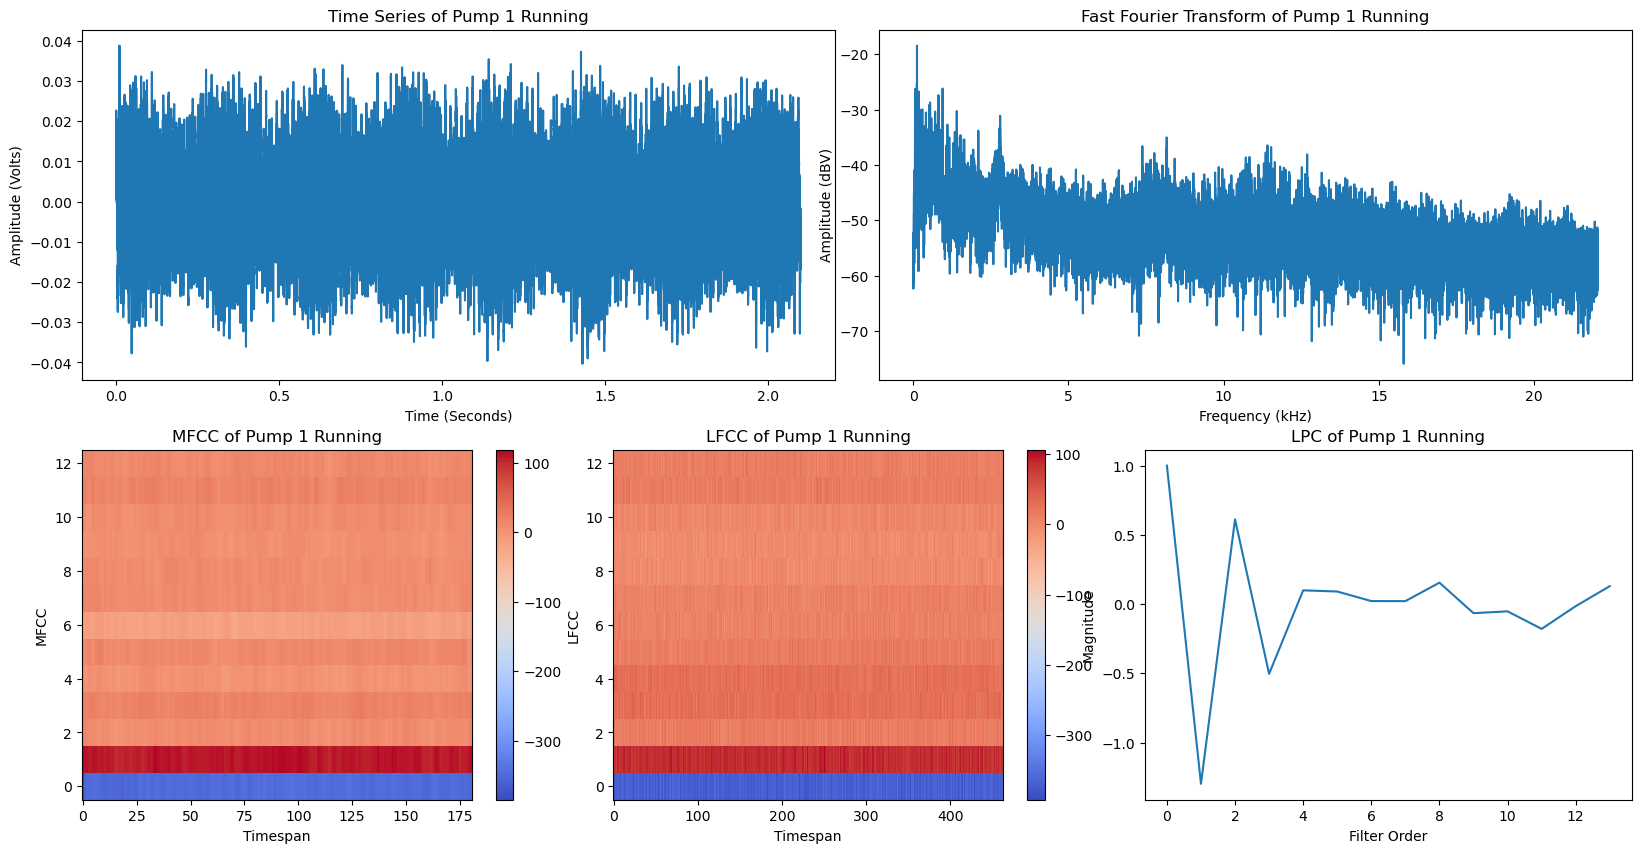

In [4]:
plotData("./Dataset/Pump 1/run/run_1.wav", 2*46298, "Pump 1 Running");

In [5]:
print("Pump 3 starting example:");
Audio('./Dataset/Pump 3/State 3/start/start_1.wav')

Pump 3 starting example:


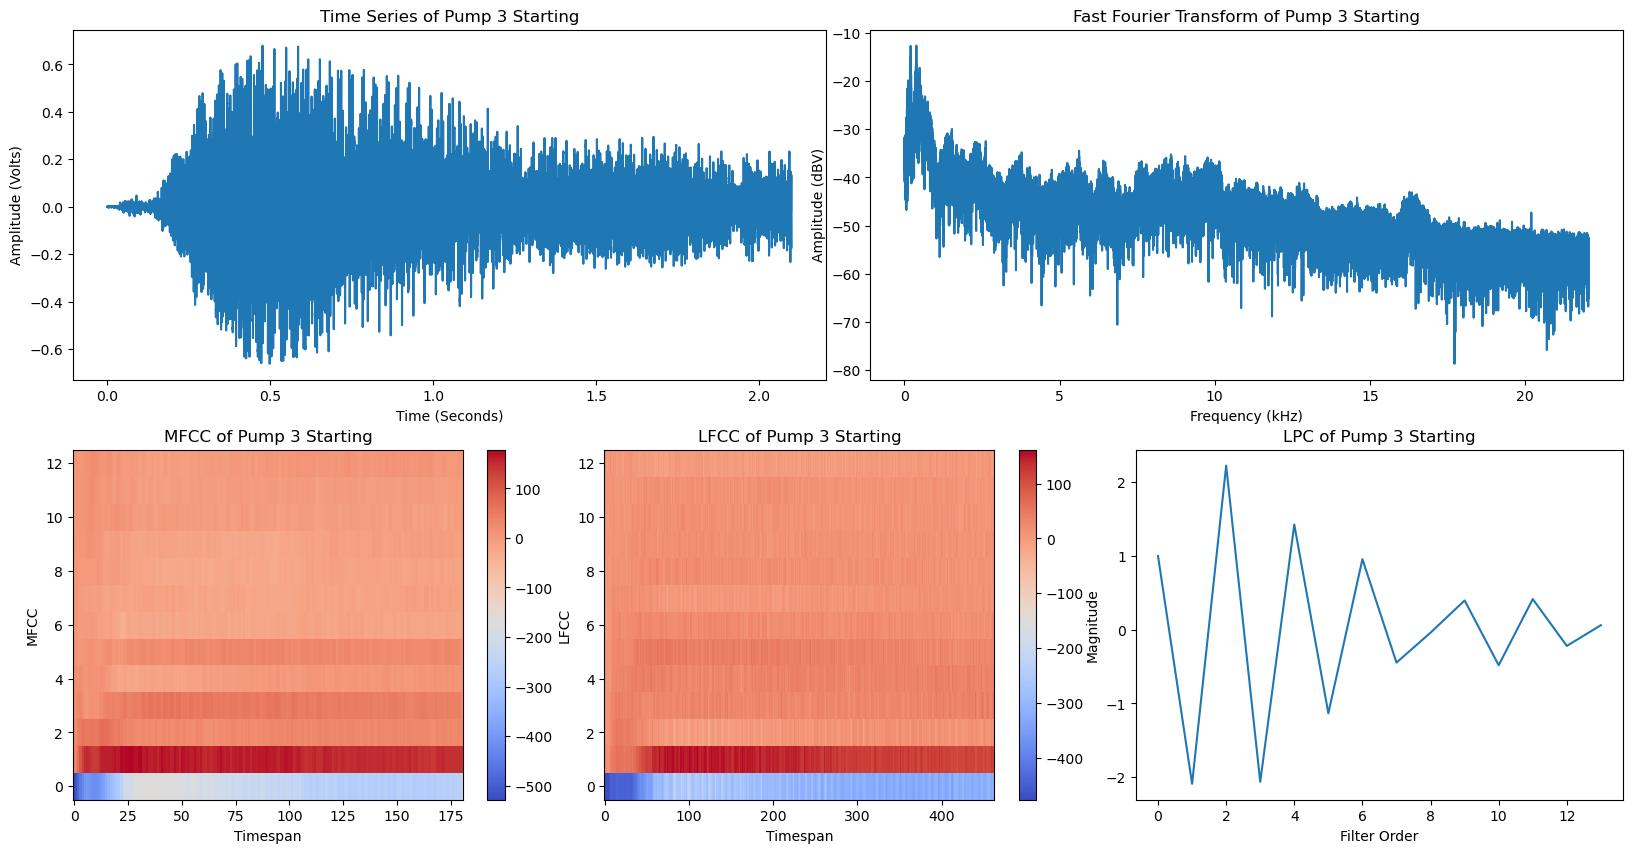

In [6]:
plotData("./Dataset/Pump 3/State 3/start/start_1.wav", 2*46298, "Pump 3 Starting");

In [7]:
print("Pump 4 stopping example:");
Audio('./Dataset/Pump 4/stop/stop_1.wav')

Pump 4 stopping example:


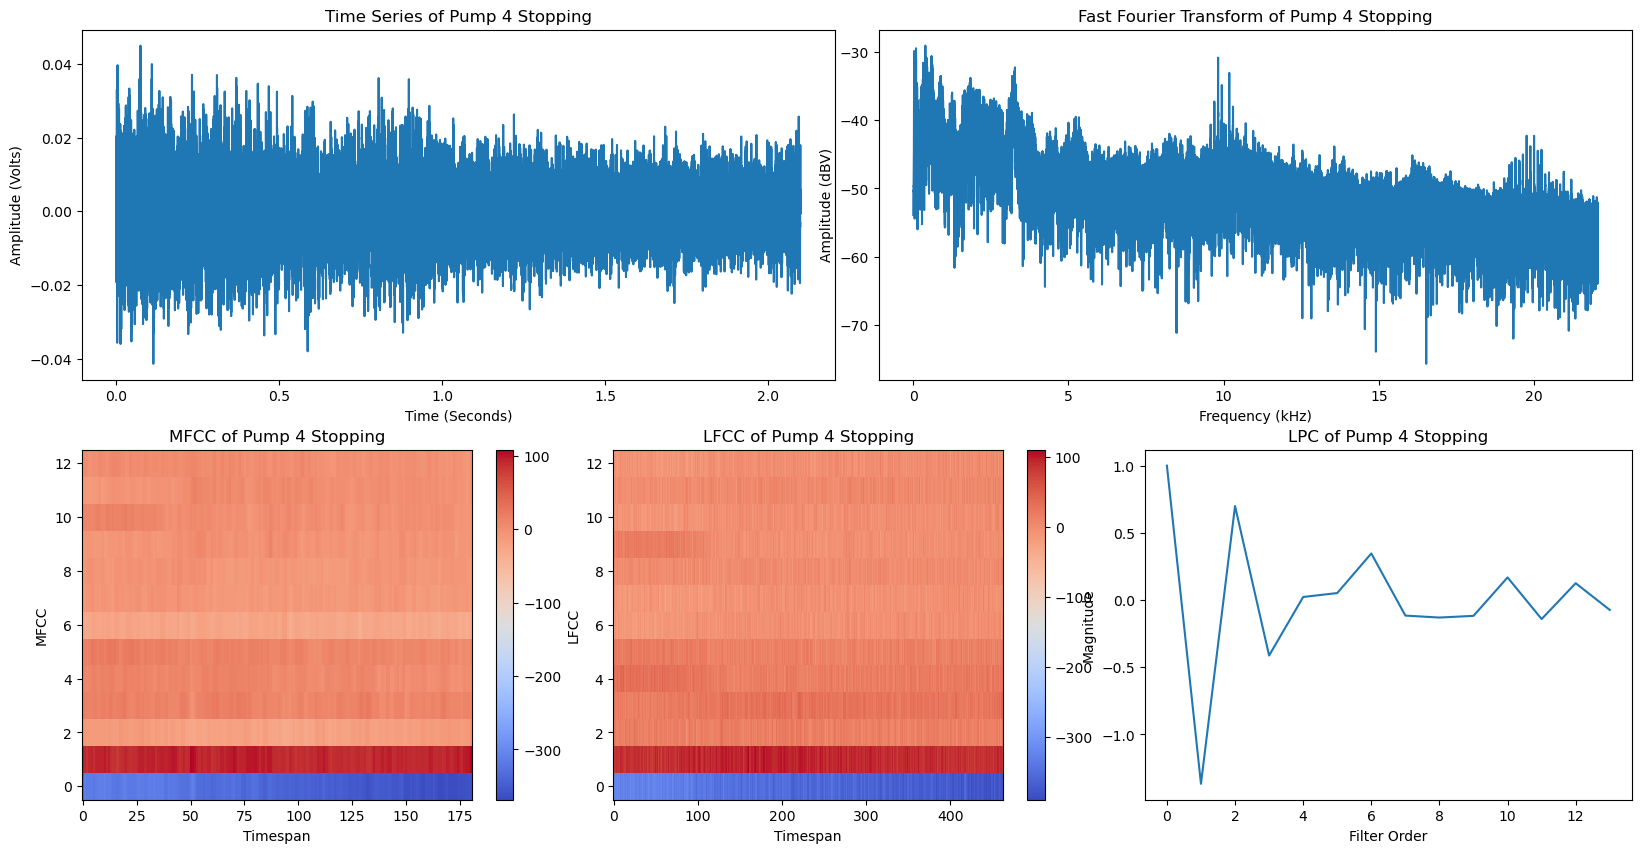

In [8]:
plotData("./Dataset/Pump 4/stop/stop_1.wav", 2*46298, "Pump 4 Stopping");